In [1]:
%load_ext autoreload
%autoreload 2

## Making plots for potential prognostic predictability

In [2]:
import xarray as xr
import numpy as np
import gfdl_utils as gu
import glob
from dask.diagnostics import ProgressBar
from information import *
from processing import *
from variance import *
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

### Time horizon, global map

In [91]:
frequency = 'monthly'
smooth = 12

In [92]:
savedir = ppeDict['datasavedir']+'/processed/ppp_timehorizon/'
ds = xr.open_mfdataset(savedir+'*.'+frequency+'.smooth_'+str(smooth)+'.nc')
grid = xr.open_dataset(ppeDict['rootdir']+ppeDict['gridfile'])

In [93]:
landmask = generate_masks(grid)['global']

In [98]:
def draw_globalmap(da,grid,save=False,addname=None):
    crsP = ccrs.Robinson(central_longitude=-90)
    crsT = ccrs.PlateCarree()

    fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':crsP})

    X = grid['geolon']
    Y = grid['geolat']
    Z = da.where(landmask)

    im = ax.pcolormesh(X,Y,Z,transform=crsT)

    ax.gridlines(color='gray',linestyle='dashed')
    ax.add_feature(cfeature.LAND,color='lightgrey')
    ax.set_title(da.name,fontsize=14)

    # Finally, add a colorbar
    cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.03,pad=0.05)
    cbar.set_label('Predictability Time Horizon (Months)',fontsize=12)
    
    fig.tight_layout()
    
    if save:
        savedir = ppeDict['figsavedir']+'/ppp_timehorizon/'
        savenames = ['ppp_timehorizon',da.name,frequency,'smooth_'+str(smooth)]
        if addname is not None:
            savenames.append(addname)
        filename = '.'.join(savenames)
        fig.savefig(savedir+filename+'.png',transparent=True,dpi=300,bbox_inches='tight')
        

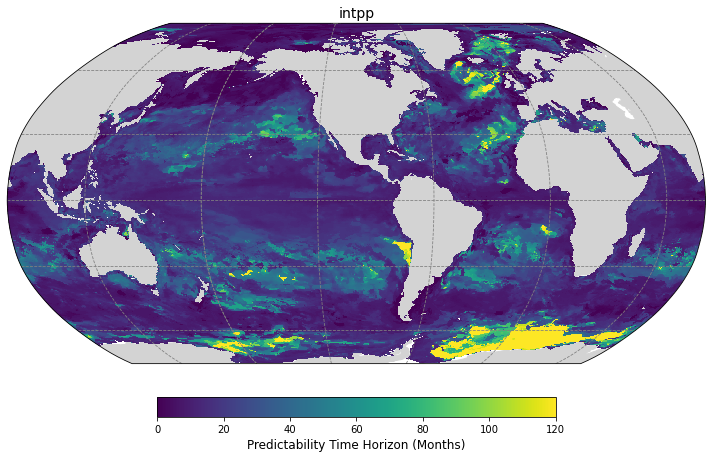

In [102]:
variable = 'intpp'
draw_globalmap(ds[variable],grid,save=True)

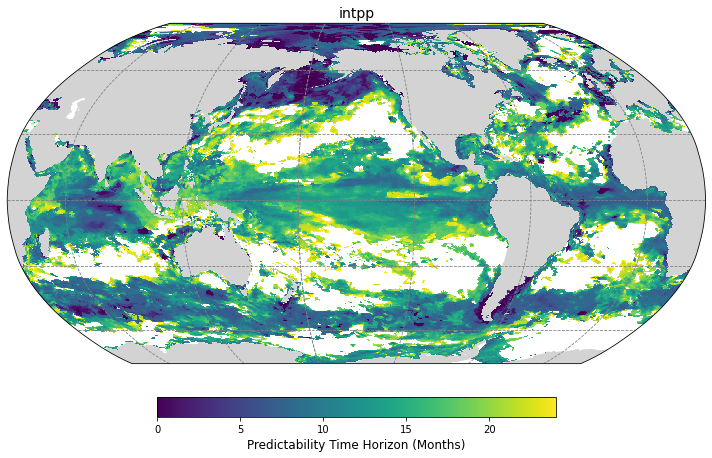

In [26]:
da = ds[variable].where(ds[variable]<=24)
draw_globalmap(da,grid,save=True,addname='under24mo')

### Regional means : compare variables

In [84]:
def draw_regionalmeans(ds):
    threshold = 0.235559205
    fig,ax=plt.subplots(figsize=(12,4))
    for name,da in ds.items():
        ax.plot(da['time']+1,da,label=name)
    ax.legend(frameon=False)
    ax.set_xlabel('Time (months)')
    ax.set_ylabel('Potential Prognostic Predictability')
    ax.set_xlim([0,da['time'].max()])
    ax.set_ylim([0,1])
    ax.axhline(threshold,linestyle='--',color='gray')
    return ax

In [85]:
savedir = ppeDict['datasavedir']+'/processed/ppp_regionalmeans/'
maskname = 'pacific_T'
filename = '.'.join(['*',frequency,maskname,'nc'])
ds = xr.open_mfdataset(savedir+filename)

<AxesSubplot:xlabel='Time (months)', ylabel='Potential Prognostic Predictability'>

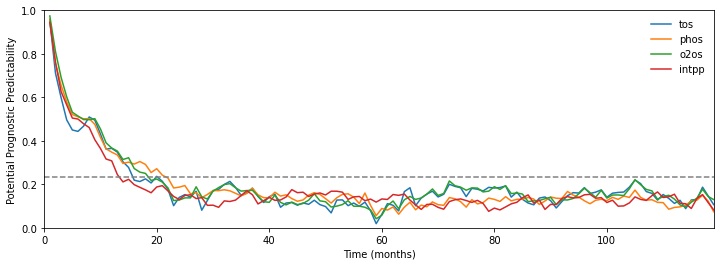

In [89]:
variables = ['tos','phos','o2os','intpp']
draw_regionalmeans(ds[variables])

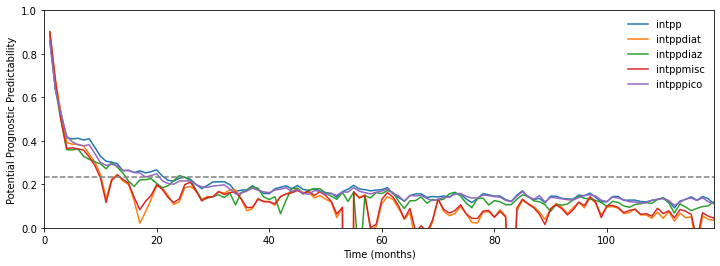

In [53]:
variables = ['intpp','intppdiat','intppdiaz','intppmisc','intpppico']
draw_regionalmeans(ds[variables])

### Regional means : compare regions

In [104]:
variable = 'intpp'

In [105]:
savedir = ppeDict['datasavedir']+'/processed/ppp_regionalmeans/'
filename = '.'.join([variable,frequency,'*','nc'])
def preprocess(ds):
    filename_components = os.path.basename(ds.encoding["source"]).split('.')
    variable = filename_components[0]
    maskname = filename_components[-2]
    return ds.rename({variable:maskname})
ds = xr.open_mfdataset(savedir+filename,preprocess=preprocess)

<AxesSubplot:xlabel='Time (months)', ylabel='Potential Prognostic Predictability'>

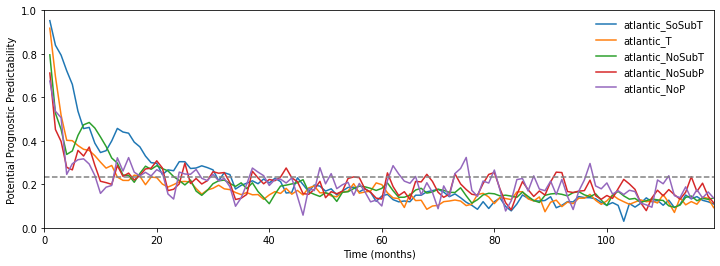

In [106]:
regions = ['atlantic_SoSubT','atlantic_T','atlantic_NoSubT','atlantic_NoSubP','atlantic_NoP']
draw_regionalmeans(ds[regions])

<AxesSubplot:xlabel='Time (months)', ylabel='Potential Prognostic Predictability'>

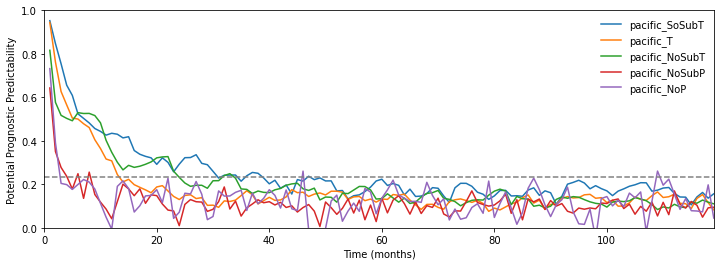

In [107]:
regions = ['pacific_SoSubT','pacific_T','pacific_NoSubT','pacific_NoSubP','pacific_NoP']
draw_regionalmeans(ds[regions])

<AxesSubplot:xlabel='Time (months)', ylabel='Potential Prognostic Predictability'>

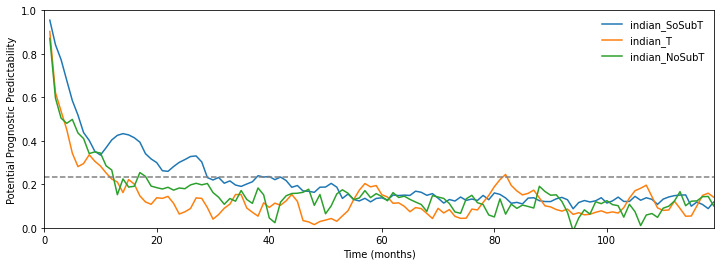

In [108]:
regions = ['indian_SoSubT','indian_T','indian_NoSubT']
draw_regionalmeans(ds[regions])

### Zonal means

In [145]:
savedir = ppeDict['datasavedir']+'/processed/ppp_zonalmeans/'
maskname = 'atlantic_global'
filename = '.'.join(['*',frequency,maskname,'nc'])
ds = xr.open_mfdataset(savedir+filename)

In [148]:
def draw_zonalmeans(da):
    fig,ax = plt.subplots(figsize=(6,8))
    im = ax.pcolormesh(da['time'],da['geolat_bin'],da.transpose(),shading='auto')
    im.set_clim([0,1])
    ax.set_xlim([0,36])
    ax.set_xlabel('Time (months)')
    ax.set_ylabel('Latitude ($^\circ N$)')
    ax.set_title(da.name,fontsize=14)
    cb = fig.colorbar(im,ax=ax,orientation='vertical',pad=0.05,fraction=0.04)
    cb.set_label('Potential Prognostic Predictability',fontsize=14)

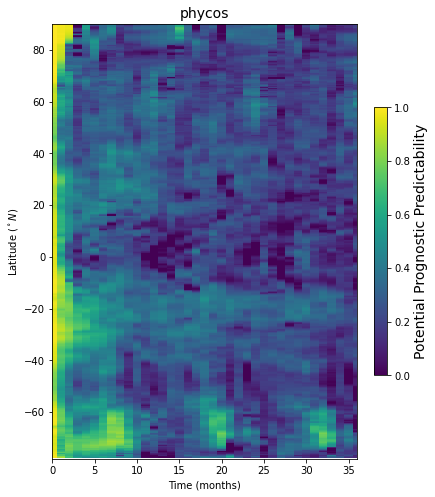

In [149]:
variable = 'phycos'
da = ds[variable]
draw_zonalmeans(da)

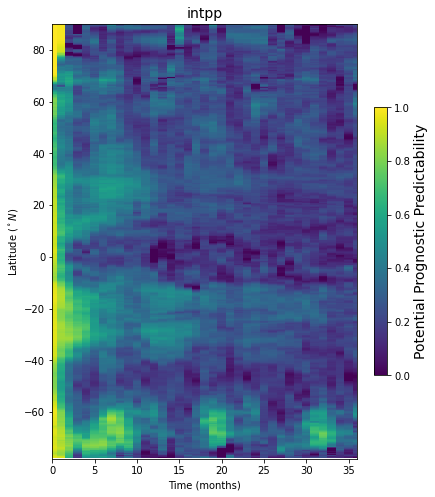

In [150]:
variable = 'intpp'
da = ds[variable]
draw_zonalmeans(da)

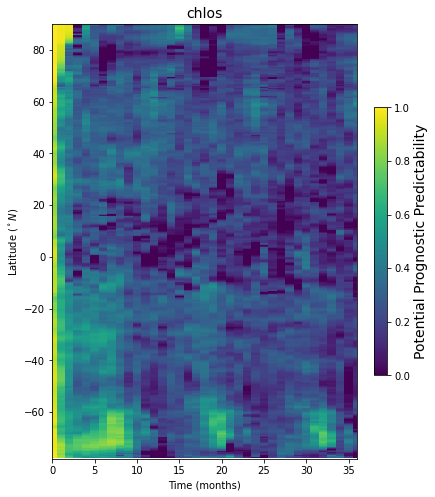

In [151]:
variable = 'chlos'
da = ds[variable]
draw_zonalmeans(da)